<a href="https://colab.research.google.com/github/Giuseppe31-s/Desafio-Cientista-de-Dados-oncase/blob/main/Desafio_oncase_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) para receitas


1.    Construa uma análise descritiva extraindo conhecimento das variáveis e apresentando quais insights podem ser obtidos a partir delas.

2.    Mostre-nos um caminho para selecionar graficamente as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê.

3.    Em cada problema descreva quais outras técnicas poderiam ser aplicadas e porquê você não as escolheu.

4.    Utilize os dados: eda_receitas_data.zip

In [ ]:
!unzip /content/eda_receitas_data.zip  #unzipando arquivo

Archive:  /content/eda_receitas_data.zip
  inflating: receitas.json           


## Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pylab as pylab
import warnings
warnings.filterwarnings("ignore")

In [ ]:

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Visualizando os dados

In [ ]:
receita = pd.read_json('/content/receitas.json')

Nos valores númericos há muitos valores faltantes.

In [ ]:
receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


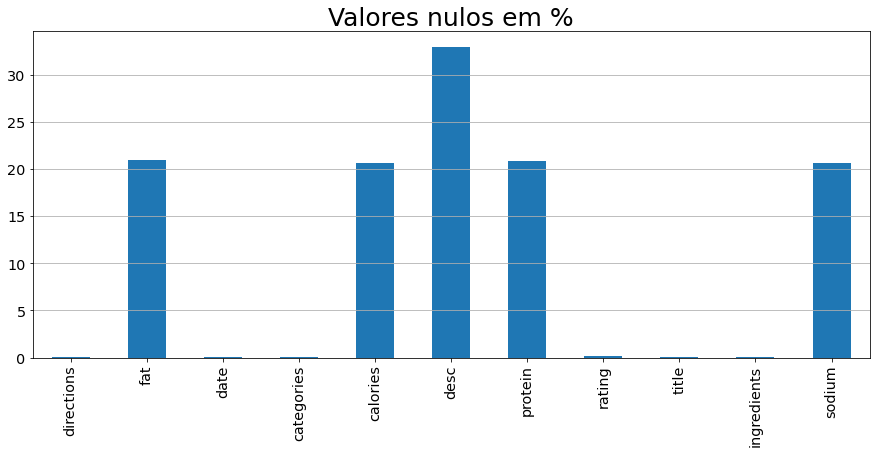

In [ ]:

  plt.figure(figsize = (15,6))
  ((receita.isna().sum()[receita.isna().sum()>0]/receita.shape[0]) * 100).plot(kind = 'bar')
  plt.grid(axis = 'y')
  plt.title('Valores nulos em %', fontsize = 25);

In [ ]:
receita.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


Vamos verificar se no nosso dataset há valores duplicados, usando a coluna ```title``` como referência.

In [ ]:
receita[receita.duplicated( subset = 'title')].head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
229,[Mash 1/2 cup blackberries with fork in small ...,1.0,2004-11-30 19:14:54+00:00,"[Sauce, Berry, Dessert, Vegetarian, Quick & Ea...",172.0,None,2.0,0.00,Blackberry-Raspberry Sauce,"[2 cups frozen blackberries, thawed, 1/4 cup b...",14.0
340,[Brush both sides of nori with sesame oil. Spr...,NaN,2007-04-25 22:50:17+00:00,"[Backyard BBQ, Grill/Barbecue, Bon Appétit]",NaN,None,NaN,5.00,Seasoned Nori Wrappers,"[4 sheets nori (dried seaweed sheets), 2 teasp...",NaN
521,"[Preheat oven to 400°F., In a dry small heavy ...",1.0,2004-08-20 04:00:00+00:00,"[Bake, Cocktail Party, Low Cal, Spice, Gourmet]",21.0,This recipe can be prepared in 45 minutes or l...,0.0,3.75,Spiced Pita Toasts,"[4 teaspoons cumin seeds, 1 teaspoon coarse sa...",38.0
602,[Heat butter in a 3-quart heavy saucepan over ...,3.0,2004-08-20 04:00:00+00:00,"[Condiment/Spread, Fruit Juice, Citrus, Christ...",194.0,This recipe is an accompaniment for Buffalo Pr...,2.0,3.75,Orange Balsamic Glaze,"[1 1/2 tablespoons unsalted butter, 1 cup fine...",697.0
718,[Mince garlic and mash to a paste with a pinch...,7.0,2004-08-20 04:00:00+00:00,"[Bread, Condiment/Spread, Fry, No-Cook, Quick ...",95.0,None,1.0,0.00,Garlic Baguette Crumbs,"[1 garlic clove, 2 tablespoons olive oil, 1/4 ...",103.0


Como pode se observar, nossos dados contém valores duplicados, vamos ajustar isso.

In [ ]:
receita.drop_duplicates(subset = 'title', inplace = True)

As colunas ```directions```, ```categories``` e ```ingredients``` em cada linha, contém listas com vários elementos dentro, e alguns desses elementos são ausentes. Vamos remover esses elementos ausentes para podermos extrair cada valor das listas.

In [ ]:
nan_ingredients = receita['ingredients'].apply(lambda x: any(pd.isna(pd.Series(x)))) # A função any é uma função de agregação de booleano ..
nan_directions = receita['directions'].apply(lambda x: any(pd.isna(pd.Series(x))))
nan_categories = receita['categories'].apply(lambda x: any(pd.isna(pd.Series(x)))) # que retorna True se pelo menos um elemento em uma coleção for verdadeira 

In [ ]:
receita = receita[(~nan_ingredients) & (~nan_directions) & (~nan_categories)]

In [ ]:
receita = receita[receita['ingredients'].apply(lambda x: len(x)) != 0]

In [ ]:
receita.reset_index(drop = True,inplace = True)

Nossas variáveis numéricas também contém bastantes valores faltantes, vamos remover esses valores, pois no futuro vamos usar as variáveis numéricas.

In [ ]:
receita = receita.dropna(subset=receita.select_dtypes(exclude=[object]).columns)

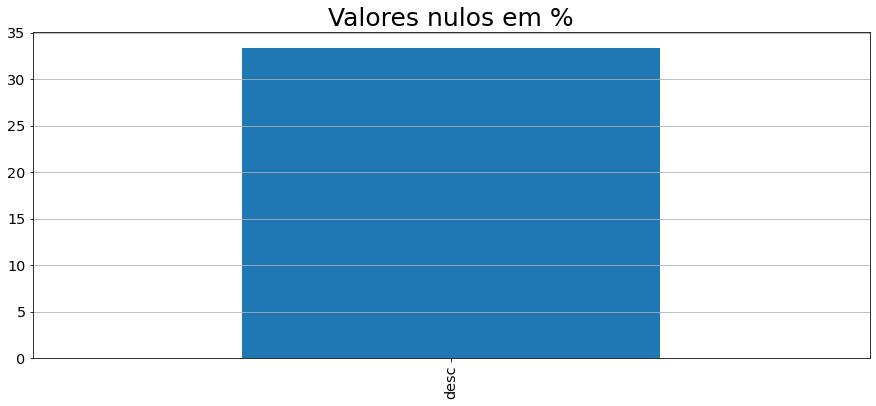

In [ ]:

  plt.figure(figsize = (15,6))
  ((receita.isna().sum()[receita.isna().sum()>0]/receita.shape[0]) * 100).plot(kind = 'bar')
  plt.grid(axis = 'y')
  plt.title('Valores nulos em %', fontsize = 25);

## Verificando as seguintes variáveis categóricas:

> ingredients


> categories

## Ingredients

In [ ]:
lista_igredientes = []
for igredientes in receita['ingredients']:
    for igrediente  in igredientes:
      lista_igredientes.append(igrediente)


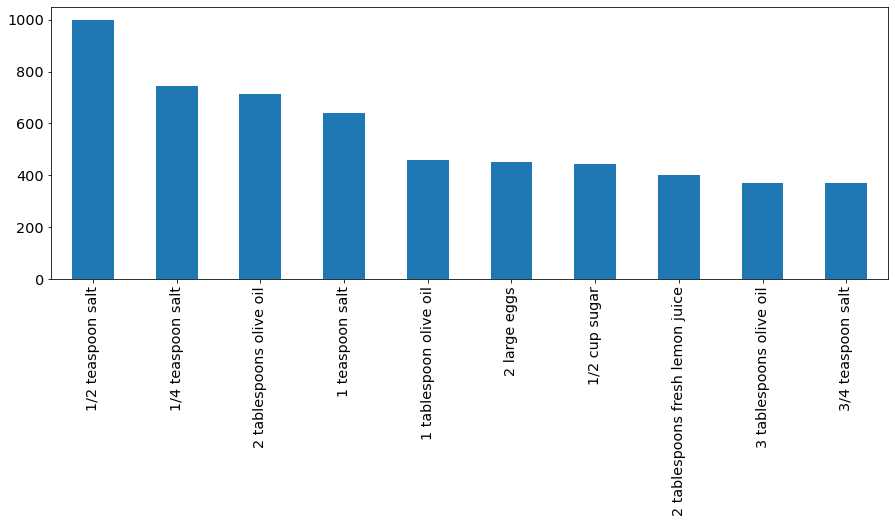

In [ ]:
pd.Series(lista_igredientes).value_counts()[:10].plot(kind='bar', x='Ingredients', y='Frequency')

Através do nosso gráfico, deu para perceber que os ingredientes estão juntos com as medidas. Iremos remover as medidas para melhor identificar os ingredientes, pois não estamos preocupados com as medidas.

## Utilizando NLP (Natural Language Processing)

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Tokenization

Tokenização é o processo de dividir uma frase em palavras ou tokens individuais. Durante esse processo, pontuações e caracteres especiais são completamente removidos. É importante ressaltar que os tokens não são necessariamente apenas uma palavra.

Quando temos palavras compostas, elas podem ter significados totalmente diferentes, como: “beija-flor” e “segunda-feira”. De uma forma geral, tokenização é o ato de simplificar o corpus e prepará-lo para os outros estágios de processamento.

In [ ]:

from nltk.corpus import stopwords

# Definir lista de stop words específicas para receitas
recipe_stopwords = set(stopwords.words('english')).union(['teaspoon','teaspoons','tablespoon','tablespoons',
                                       'cup','cups','grams','chopped','peeled','cut','into','chunk','small',
                                       'large','ounce','dash','fresh','qt','about','ten','two','inch',
                                      'half','oz','medium','crushed','hours','in','raw','dried','dry',
                                        'freshly','ground','squeezed','half', 'crosswise'])

# Percorrer cada lista da receita
def limpador_ingredientes(word):


      tokens = nltk.word_tokenize(word)
      # Remover stop words e converter para letra minúscula
      filtered_tokens = [token.lower() for token in tokens if token.lower() not in recipe_stopwords and token.isalpha()]
      # Se a palavra filtrada não estiver vazia, adicionar à lista de ingredientes
      if filtered_tokens:
          return ' '.join(filtered_tokens)



In [ ]:
teste = receita.copy()

In [ ]:
teste['ingredients'].explode()

0        4 cups low-sodium vegetable or chicken stock
0                           1 cup dried brown lentils
0                  1/2 cup dried French green lentils
0                            2 stalks celery, chopped
0                  1 large carrot, peeled and chopped
                             ...                     
17739                                    4 cups water
17739                          1 cup orange marmalade
17739        1/4 cup prepared cream style horseradish
17739             1/4 cup (packed) golden brown sugar
17739                       2 cups fresh orange juice
Name: ingredients, Length: 144932, dtype: object

In [ ]:

lista_ingredientes = receita['ingredients'].explode()
lista_limpa = lista_ingredientes.apply(limpador_ingredientes)

In [ ]:
receita['ingredients'] = lista_limpa.groupby(lista_limpa.index).apply(lambda x: x.to_list())

## Ingredientes sem as medidas

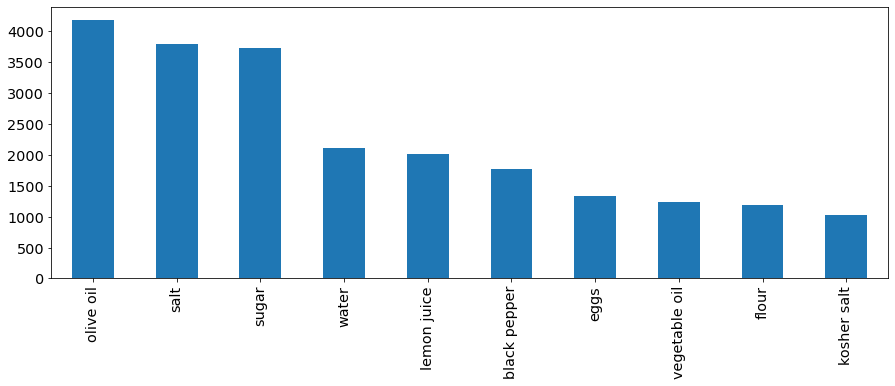

In [ ]:
pd.Series(lista_limpa).value_counts()[:10].plot(kind='bar', x='Ingredients', y='Frequency');

## Categories

In [ ]:
lista_categoria = []
for categorias in receita['categories']:
    for categoria  in categorias:
      lista_categoria.append(categoria)

Levando em consideração que Bon Appétit não tem nada a ver com a categoria da receita, vamos ignorar esse valor, visto que ela representa o nome de uma revista importante de culinária.

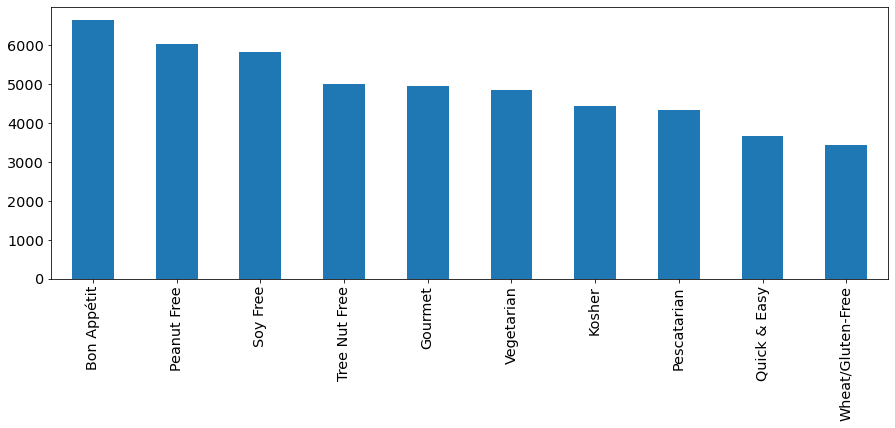

In [ ]:
pd.Series(lista_categoria).value_counts()[:10].plot(kind='bar', x='Ingredients', y='Frequency');

Gráfico sem o Bon Appétit:

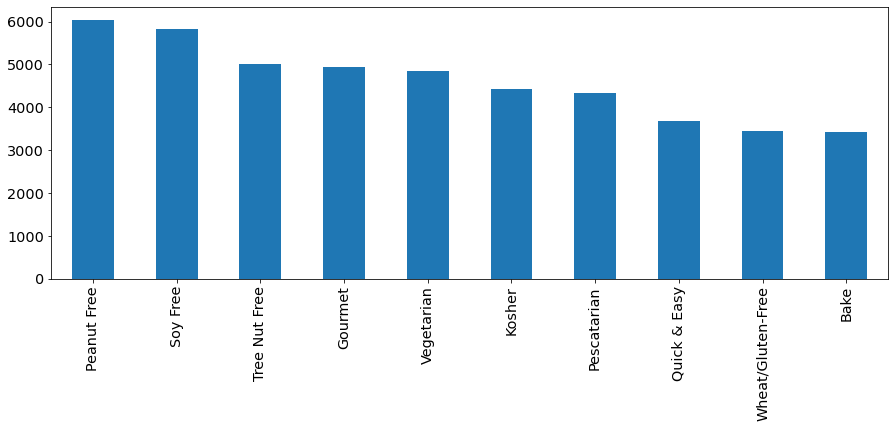

In [ ]:
pd.Series(lista_categoria).value_counts()[1:11].plot(kind='bar', x='Ingredients', y='Frequency');

Receitas do Bon appétit:

In [ ]:
bonappetit = receita['categories'].apply(lambda x: any(pd.Series(x).isin(['Bon Appétit'])))
bonappetit = receita[bonappetit]

Demostrando que a categoria Bon appétit não é excludente com nenhuma outra.

In [ ]:
lista_categoria_bonappetit = []
for categorias in bonappetit['categories']:
    for categoria  in categorias:
      lista_categoria_bonappetit.append(categoria)

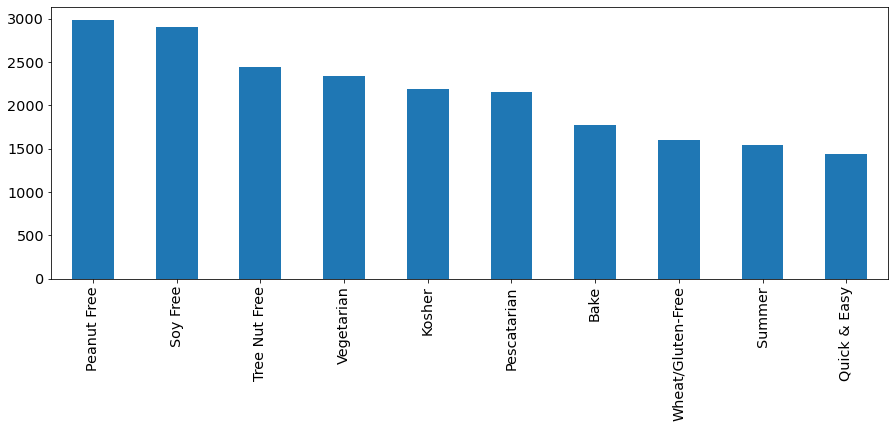

In [ ]:
pd.Series(lista_categoria_bonappetit).value_counts()[1:11].plot(kind='bar', x='Ingredients', y='Frequency');

## WordCloud

Vamos criar WordCloud para podermos visualizar melhor quais palavras se repetem com maior frequência nos nosso valores categóricos.

In [ ]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
lista_instrucoes = []
for instrucoes in receita['directions']:
    for instrucao  in instrucoes:
      for i in instrucao:
        lista_instrucoes.append(i)

In [ ]:
lista_titulos = []
for titulos in receita['title']:
    for titulo  in titulos:
      lista_titulos.append(instrucao)

In [ ]:
desc = receita['desc'].dropna()

In [ ]:
lista_descricoes = []
for descricoes in desc:
    for descricao  in descricoes:
      lista_descricoes.append(descricao)

In [ ]:
" ".join(s for s in lista_igredientes[:5])

'4 cups low-sodium vegetable or chicken stock 1 cup dried brown lentils 1/2 cup dried French green lentils 2 stalks celery, chopped 1 large carrot, peeled and chopped'

In [ ]:
descricoes = "".join(s for s in lista_descricoes)
instrucoes = "".join(s for s in lista_instrucoes)
categorias = " ".join(s for s in lista_categoria)
titulos = " ".join(s for s in lista_titulos)
igredientes = " ".join(s for s in lista_igredientes)




In [ ]:
dicionario = {
    'Descrições':descricoes,
    'Instruções':instrucoes,
    'Categorias':categorias,
    'Títulos':titulos,
    'Ingredientes':igredientes

}

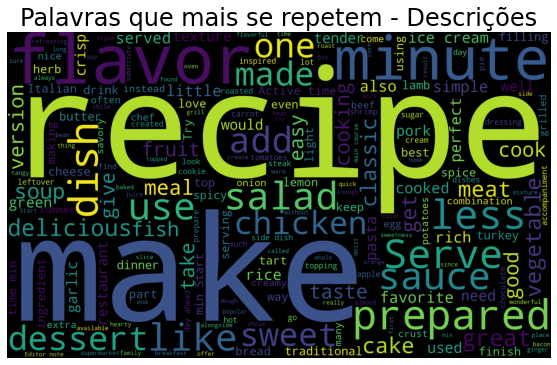

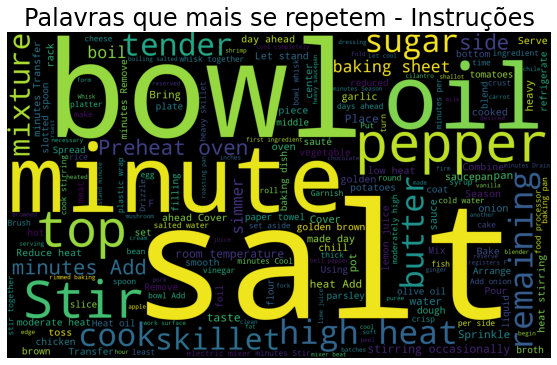

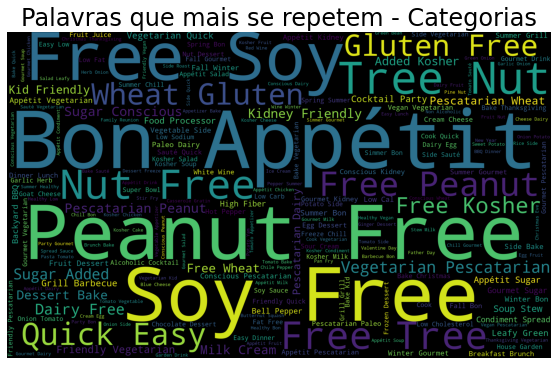

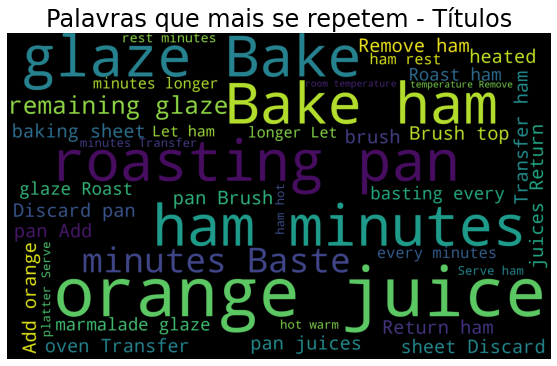

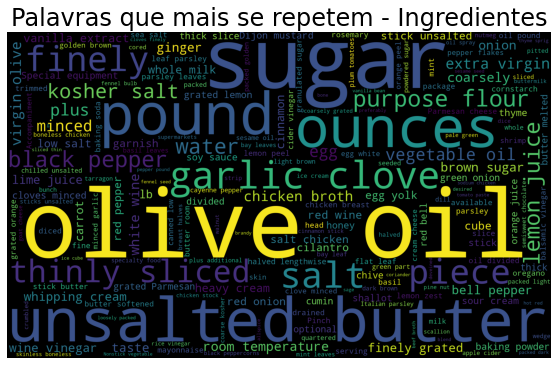

In [ ]:

for i in dicionario.keys():
  wordcloud = WordCloud(stopwords=recipe_stopwords,
                        background_color="black",
                        width=2000, height=1200).generate(dicionario[i])
  # mostrar a imagem final
  fig, ax = plt.subplots(figsize=(10,6))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.set_axis_off()
  plt.imshow(wordcloud);
  plt.title(f'Palavras que mais se repetem - {i}', fontsize = 24);

##Vamos conferir as estatísticas descritivas do dataframe.

In [ ]:
receita.describe().round(2)

,fat,calories,protein,rating,sodium
count,14035.00,14035.00,14035.00,14035.00,14035.00
mean,373.61,6831.26,94.75,3.77,6780.81
std,21671.10,380964.79,3565.73,1.26,354152.69
min,0.00,0.00,0.00,0.00,0.00
25%,9.00,209.00,3.00,3.75,93.00
50%,18.00,352.00,9.00,4.38,312.00
75%,35.00,606.00,29.00,4.38,742.00
max,1722763.00,30111218.00,236489.00,5.00,27675110.00


Claramente há outlier no nosso dataframe.

Alguns métodos para remover outliers:

1.    Método IQR: Neste método, você calcula a amplitude interquartil (IQR) dos seus dados, que é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Qualquer valor que esteja fora da faixa definida por Q1 - 1,5 x IQR e Q3 + 1,5 x IQR é considerado um outlier.

2.    Análise univariada: Neste método, você realiza uma análise univariada dos seus dados, examinando a distribuição de cada variável individualmente. Valores que estão fora do intervalo de confiança de 95% (calculado a partir da média e do desvio padrão) são considerados outliers.

3. Visualização de dados: Outra maneira de identificar outliers é através de visualizações dos dados, como gráficos de dispersão ou box plots. Essas visualizações podem ajudar a identificar pontos que estão muito distantes dos outros pontos em seus dados.

**Há muitas formas de remover outlier, mas acredito que essas sejam as mais simples e eficiêntes nesse contexto.**


Vamos utilizar os **métodos IQR e Boxplot** pois são eficientes e muito simples de serem utilizados.

Em relação ao não uso da **análise univaridada** ou Z-score, é importante saber se a distribuição daquela variável faz sentido, e como entendo muito pouco do assunto nutrição, acho melhor não tentar definir distribuições falsas.



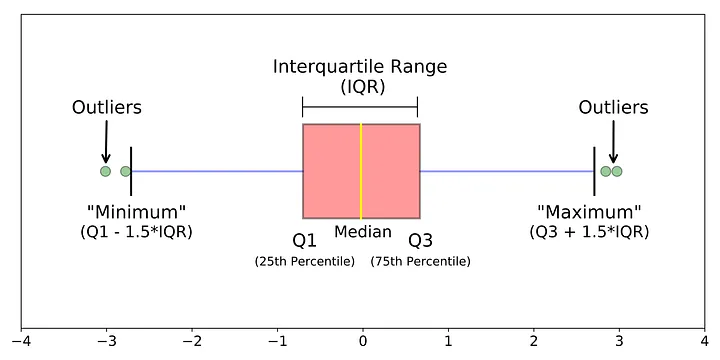

## Boxplot

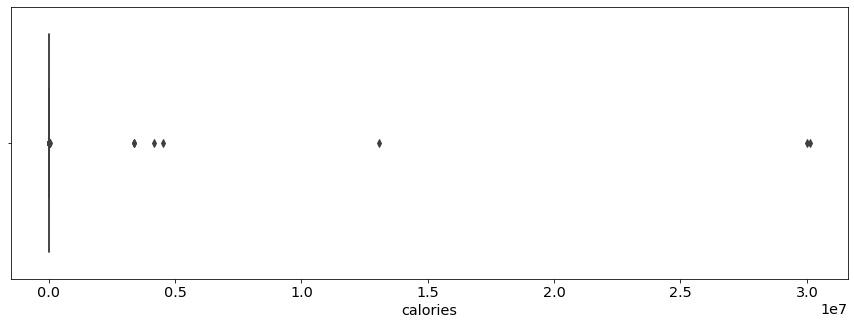

In [ ]:
sns.boxplot(receita['calories']);

Método IQR:

* data < Q1 − 1.5 × IQR


* data > Q3 + 1.5 × IQR

In [ ]:
from scipy.stats import iqr
iqr = iqr(receita['calories'])
lower_threshold = np.quantile(receita['calories'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(receita['calories'], 0.75) + 1.5 * iqr

In [ ]:
print('Limite inferior:',round(lower_threshold,2))
print('Limite superior:',round(upper_threshold,2))

Limite inferior: -386.5
Limite superior: 1201.5


In [ ]:
receita1 = receita[(receita['calories']< upper_threshold) & (receita['calories'] >lower_threshold)]

É normal que após a remoção de outliers apareçam outros outliers.

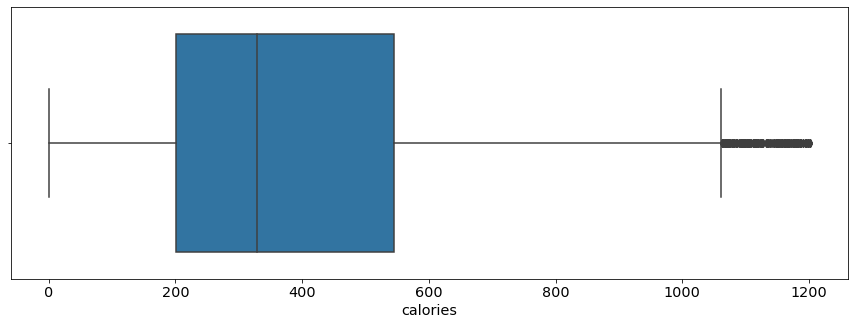

In [ ]:
sns.boxplot(receita1['calories']);

In [ ]:
receita1.describe()

,fat,calories,protein,rating,sodium
count,13165.000000,13165.000000,13165.000000,13165.000000,13165.000000
mean,21.565515,396.282340,16.551234,3.756741,598.438359
std,18.699564,259.553491,20.038281,1.269883,2707.112448
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,201.000000,3.000000,3.750000,83.000000
50%,17.000000,329.000000,8.000000,4.375000,281.000000
75%,30.000000,545.000000,24.000000,4.375000,662.000000
max,120.000000,1201.000000,192.000000,5.000000,132220.000000


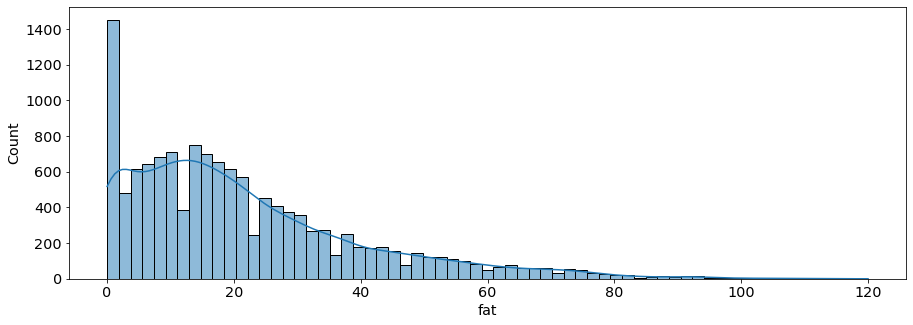

In [ ]:
sns.histplot(receita1['fat'],kde = True)

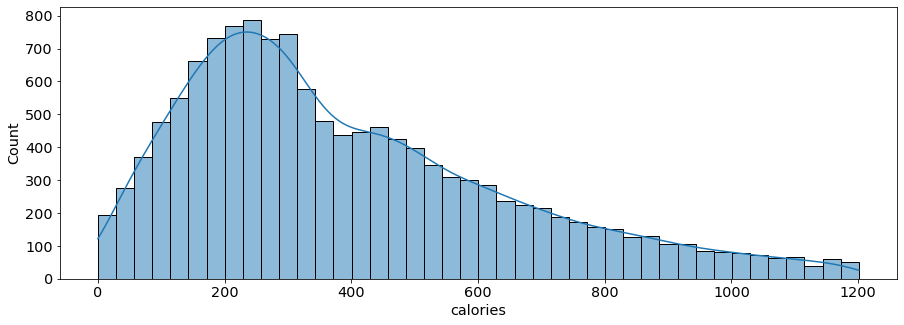

In [ ]:
sns.histplot(receita1['calories'],kde = True)

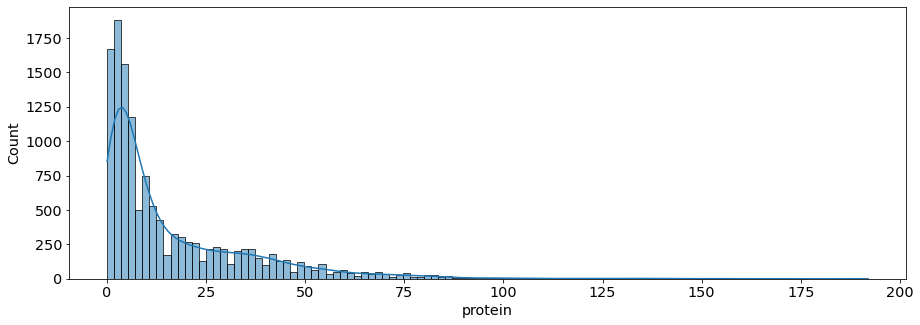

In [ ]:
sns.histplot(receita1['protein'],kde = True)

Mesmo após a remoção de outliares, algumas variáveis ainda mantém valores absurdos. Vamos verificar as primeiras 3 receitas com maior teor de sódio.

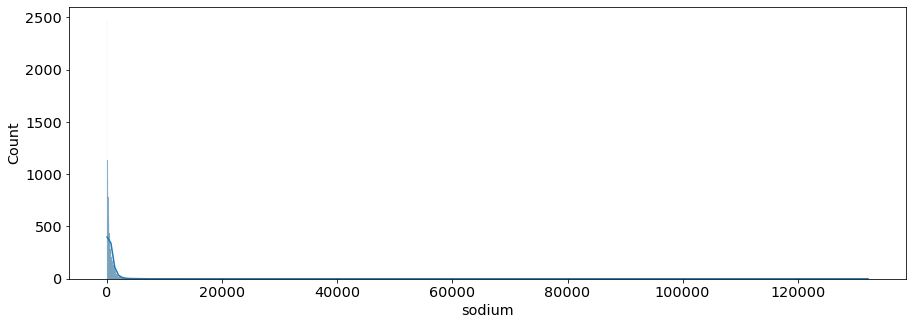

In [ ]:
sns.histplot(receita1['sodium'],kde = True)

In [ ]:
receita1.sort_values('sodium', ascending = False)[:3]

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
3184,[Preheat oven to 400°F. Stir salt and 5 egg wh...,20.0,2007-01-18 04:46:01+00:00,"[Salad, Egg, Fish, Olive, Bake, Roast, Bass, C...",417.0,Roasting the fish in salt makes it very moist ...,53.0,5.000,Whole Branzino Roasted in Salt,"[box coarse kosher salt, egg whites, whole bra...",132220.0
14617,"[Preheat oven to 400°F. Toss tomatoes, bell pe...",20.0,2004-08-20 04:00:00+00:00,"[Fish, Pepper, Tomato, Appetizer, Bake, Christ...",425.0,"The salt creates a seal around the fish, which...",49.0,4.375,Red Snapper Baked in Salt with Romesco Sauce,"[plum tomatoes, red bell peppers, onion unpeel...",132025.0
9904,"[Preheat oven to 500°F., Bring a 6- to 8-quart...",24.0,2004-08-20 04:00:00+00:00,"[Herb, Bake, Bacon, Oyster, Leek, Spinach, Fal...",443.0,Stitt likes to use rock salt — the kind used f...,29.0,0.000,Baked Oysters with Bacon,"[kosher salt, bags spinach coarse stems discar...",116178.0


Os 3 primeiros pratos com a maior quantidade de sódio são esses:

> Whole Branzino Roasted in Salt

> Red Snapper Baked in Salt with Romesco Sauce

> Baked Oysters with Bacon


**Whole Branzino Roasted in Salt**

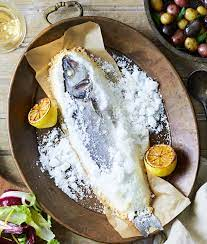

**Red Snapper Baked in Salt with Romesco Sauce**

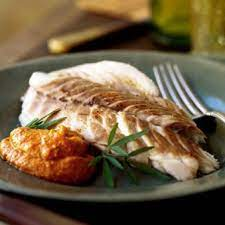

**Baked Oysters with Bacon**

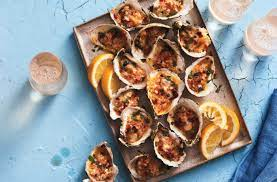

A primeira receita ter um valor tão elevado de sódio acaba fazendo sentido, logo acredito que não há a necessidade de remover esses valores.

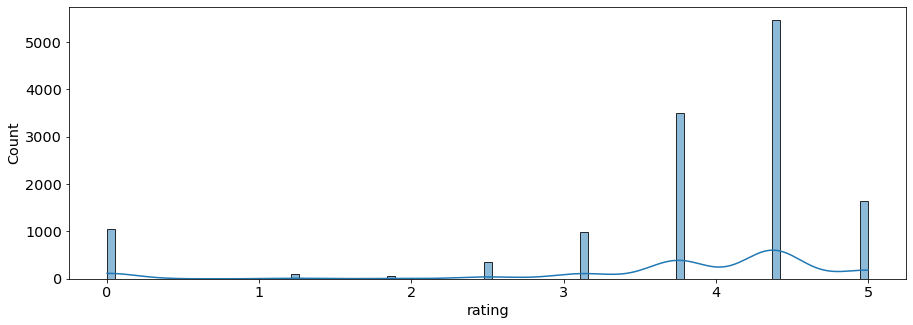

In [ ]:
sns.histplot(receita1['rating'],kde = True)

Nossas gráficos demonstram que as variáveis numéricas contém uma assimetria positiva muito elevada, e que pelo fato das comidas serem muito variadas em relação aos seus valores nutricionais, faz sentido os gráficos se comportar desta forma. Para lidarmos com isso, vamos utilizar o log, porém, antes  é preciso adicionar o valor 1 em todos os nossos valores 0, pois log de zero é -inf.

In [ ]:
receita1.loc[receita1['fat']==0,'fat'] = 1
receita1.loc[receita1['calories']==0,'calories'] = 1
receita1.loc[receita1['protein']==0,'protein'] = 1
receita1.loc[receita1['sodium']==0,'sodium'] = 1

In [ ]:
receita1['log_fat'] = np.log(receita1['fat'])
receita1['log_calories'] = np.log(receita1['calories'])
receita1['log_protein'] = np.log(receita1['protein'])
receita1['log_sodium'] = np.log(receita1['sodium'])

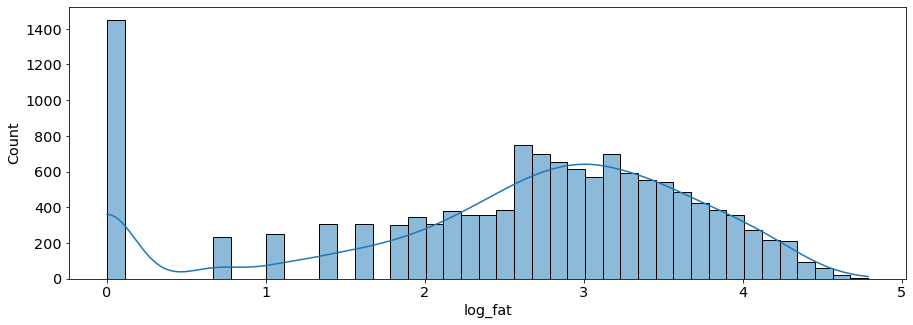

In [ ]:
sns.histplot(receita1['log_fat'],kde = True)

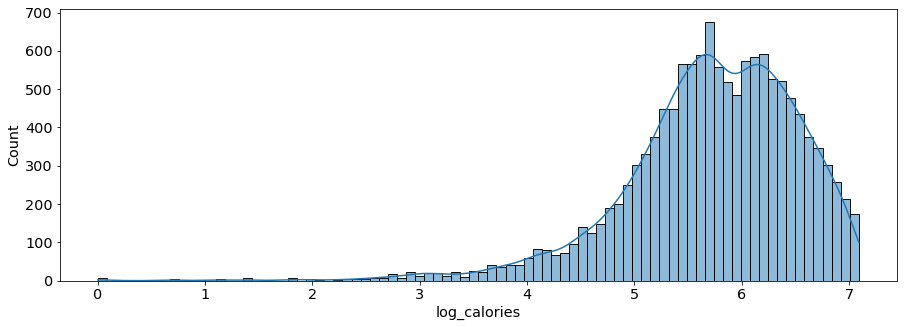

In [ ]:
sns.histplot(receita1['log_calories'],kde = True)

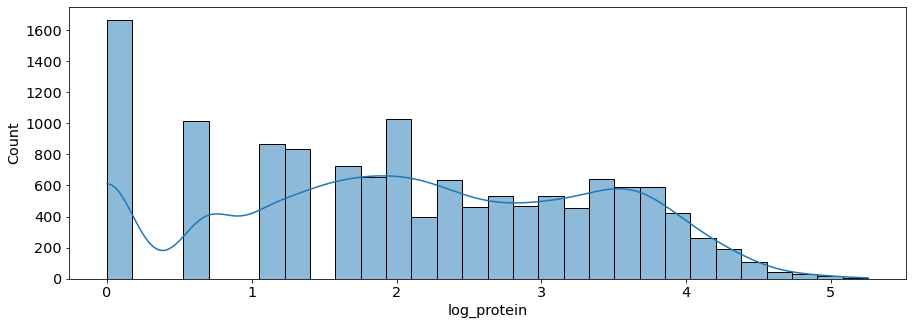

In [ ]:
sns.histplot(receita1['log_protein'],kde = True)

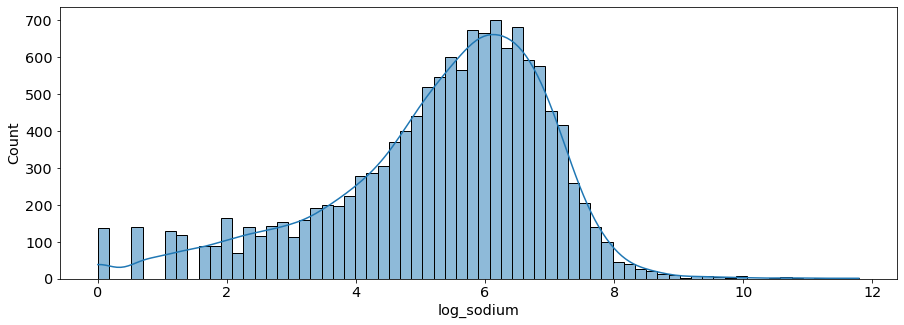

In [ ]:
sns.histplot(receita1['log_sodium'],kde = True)

Vamos visualizar como os nossos dados se comportam entre si.

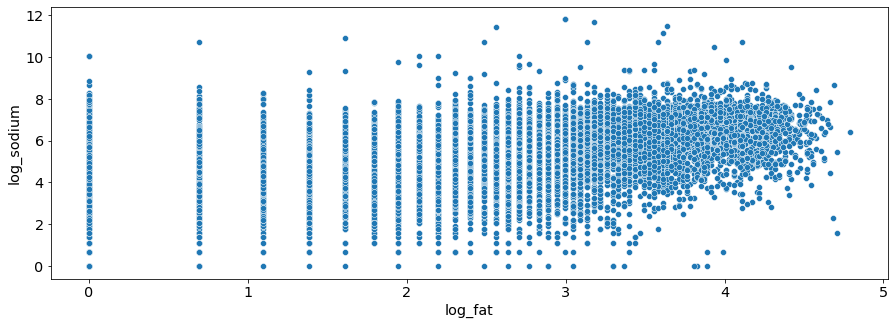

In [ ]:
sns.scatterplot(receita1['log_fat'], receita1['log_sodium'])

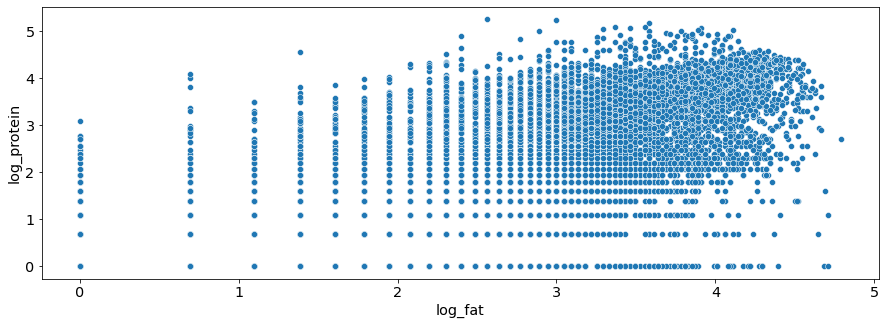

In [ ]:
sns.scatterplot(receita1['log_fat'], receita1['log_protein'])

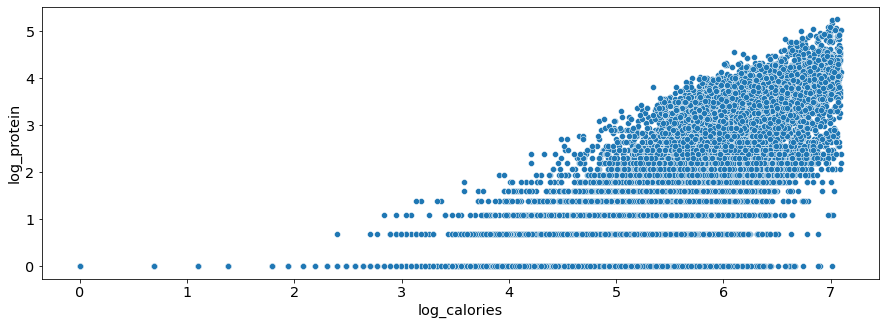

In [ ]:
sns.scatterplot(receita1['log_calories'], receita1['log_protein'])

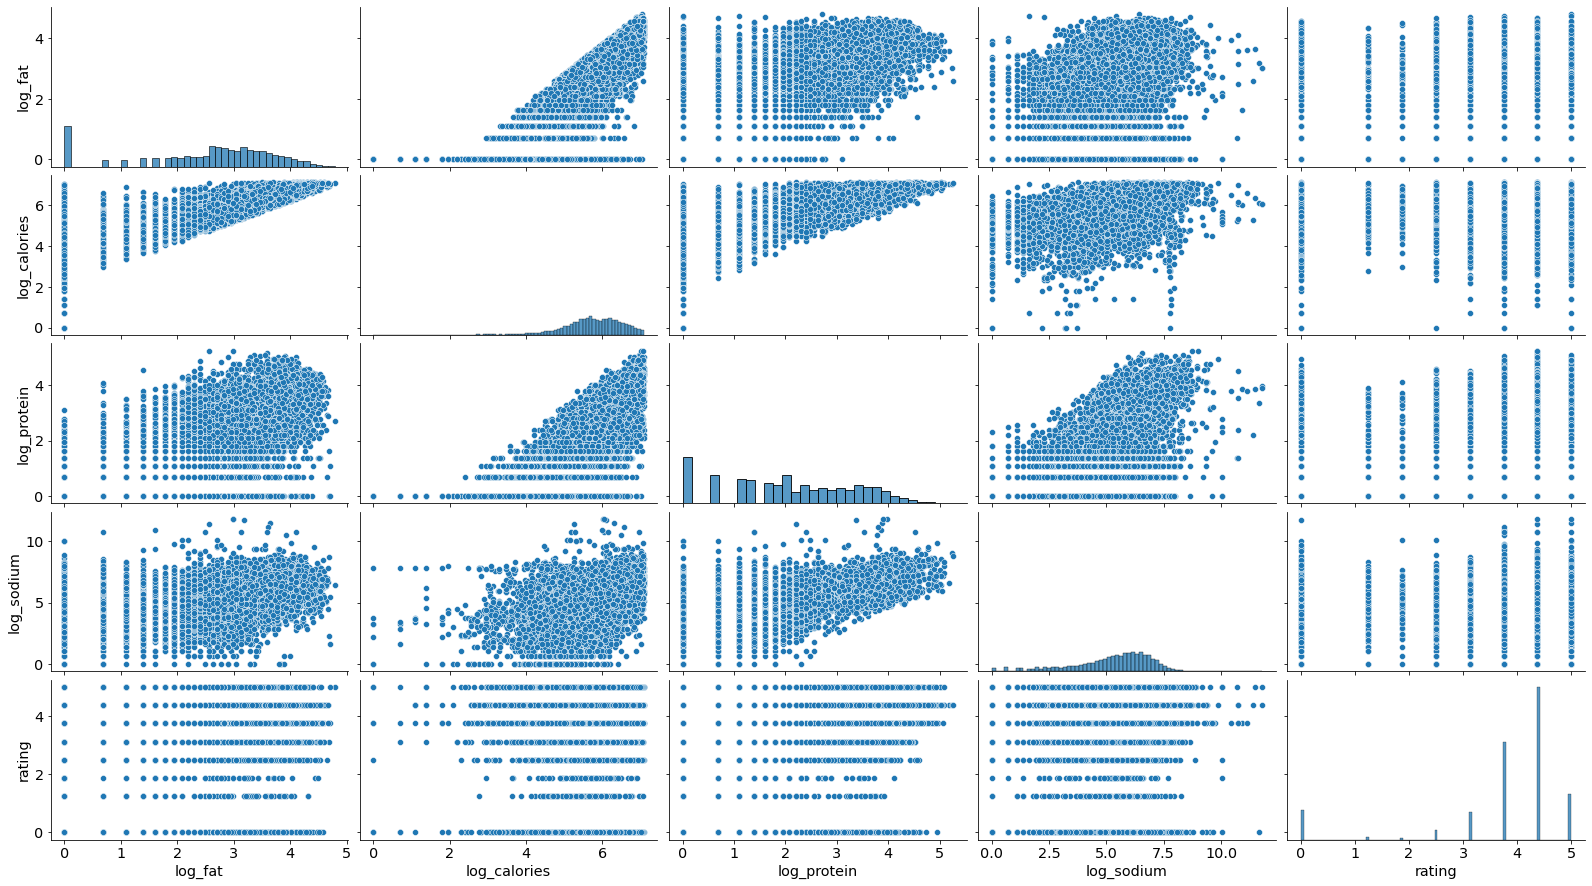

In [ ]:

sns.pairplot(receita1[list(receita1.corr().columns[5:])+['rating']], aspect=1.8)

## Verificando correlações

> Correlação de Pearson: É uma medida que avalia a relação linear entre duas variáveis contínuas. A correlação varia de -1 (correlação perfeita negativa) a +1 (correlação perfeita positiva), sendo que 0 indica nenhuma correlação. A correlação de Pearson pode ser útil para avaliar a relação entre variáveis como idade e renda, por exemplo.

> Correlação de Spearman: É uma medida que avalia a relação monótona entre duas variáveis. A correlação varia de -1 (correlação perfeita negativa) a +1 (correlação perfeita positiva), sendo que 0 indica nenhuma correlação. A correlação de Spearman é especialmente útil para avaliar a relação entre variáveis ordinais, como a posição de chegada em uma corrida e o tempo de corrida, por exemplo.

Por padrão, a função usa a correlação de Pearson.

Valores sem o Log.

In [ ]:
corr_semlog = receita1.corr()[receita1.corr().columns[:5]][:5]
corr_semlog

,fat,calories,protein,rating,sodium
fat,1.000000,0.858562,0.560298,0.142305,0.078264
calories,0.858562,1.000000,0.696706,0.137965,0.105082
protein,0.560298,0.696706,1.000000,0.125493,0.161995
rating,0.142305,0.137965,0.125493,1.000000,0.016514
sodium,0.078264,0.105082,0.161995,0.016514,1.000000


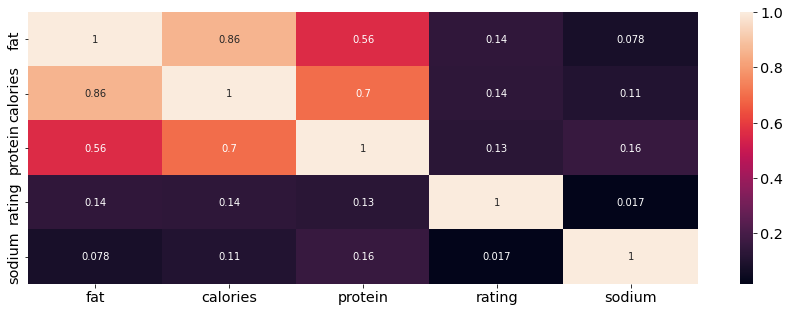

In [ ]:
sns.heatmap(corr_semlog,annot=True)

Valor com log.

In [ ]:
corr_log = receita1[list(receita1.corr().columns[5:])+['rating']].corr()
corr_log

,log_fat,log_calories,log_protein,log_sodium,rating
log_fat,1.000000,0.756946,0.683232,0.555638,0.208393
log_calories,0.756946,1.000000,0.706408,0.455218,0.146775
log_protein,0.683232,0.706408,1.000000,0.678030,0.184401
log_sodium,0.555638,0.455218,0.678030,1.000000,0.176004
rating,0.208393,0.146775,0.184401,0.176004,1.000000


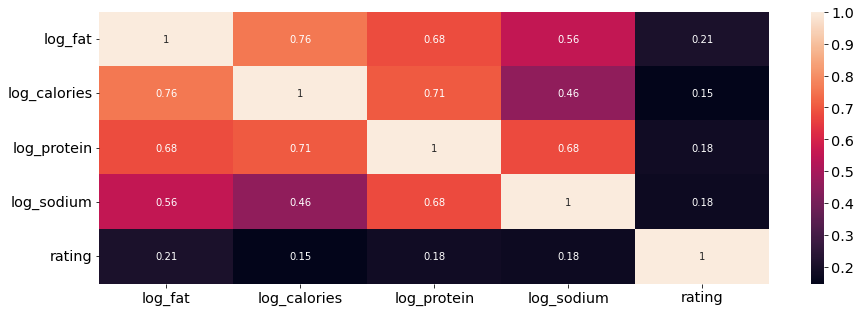

In [ ]:
sns.heatmap(corr_log,annot=True);

Através da correlação, da para perceber uma ligação baixa entre o rating e as variáveis numéricas com log. Vamos ver visualmente se isso se comprova.

Todos os valores chegando no rating de 5 decrescem, comprovando a correlação baixa e provando que uma refeição equilibrada tem maior pontuação.

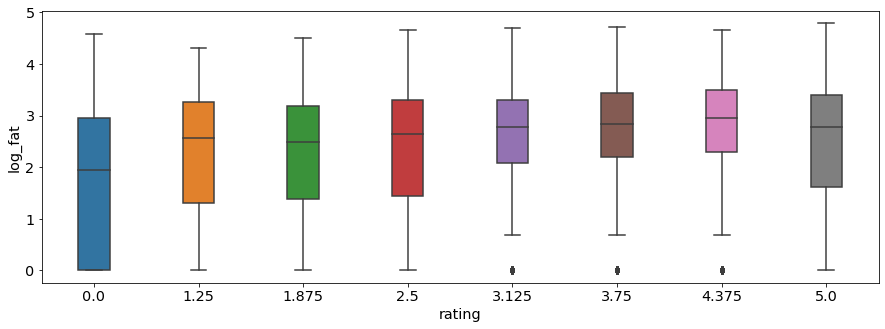

In [ ]:
sns.boxplot(y = 'log_fat', x ='rating', data = receita1 ,width=.3)

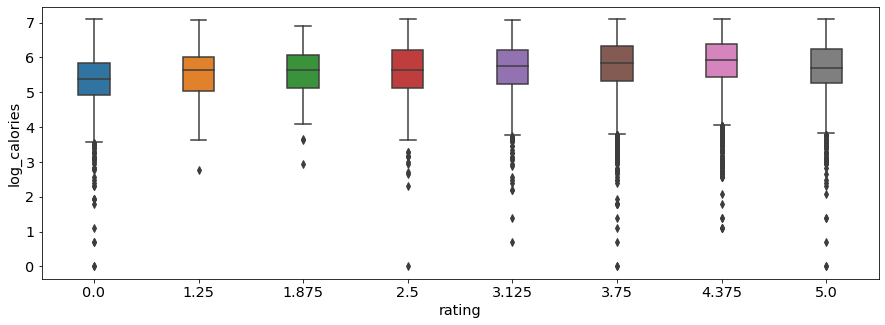

In [ ]:
sns.boxplot(y = 'log_calories', x ='rating', data = receita1 ,width=.3);

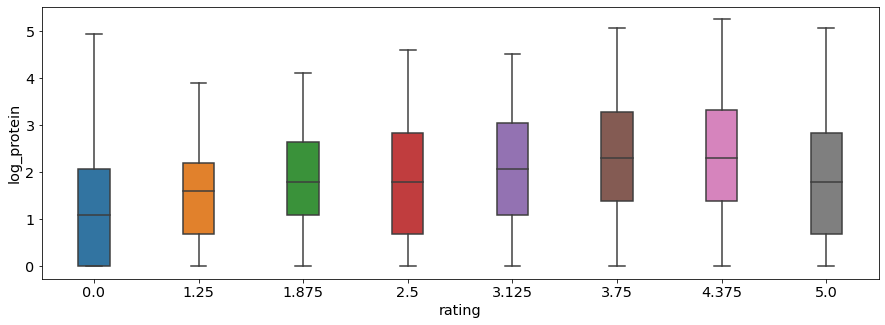

In [ ]:
sns.boxplot(y = 'log_protein', x ='rating', data = receita1 ,width=.3);

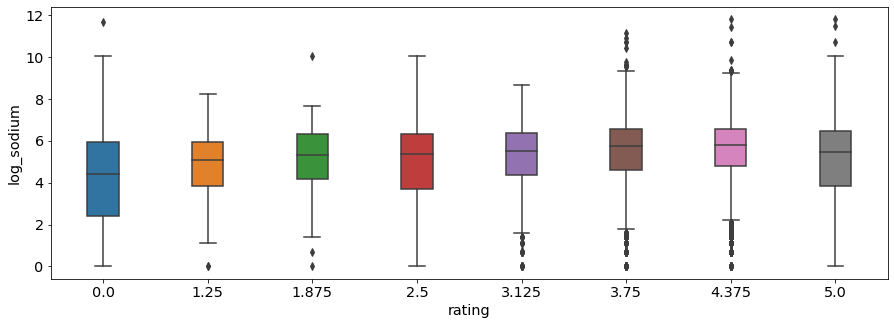

In [ ]:
sns.boxplot(y = 'log_sodium', x ='rating', data = receita1 ,width=.3);

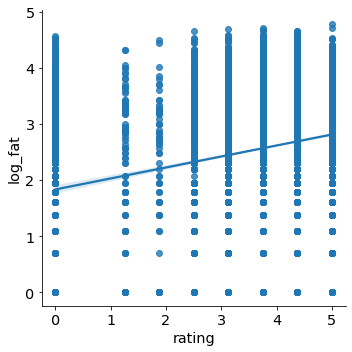

In [ ]:
sns.lmplot(y = 'log_fat', x ='rating', data = receita1 )

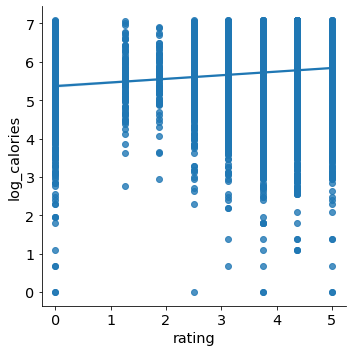

In [ ]:
sns.lmplot(y = 'log_calories', x ='rating', data = receita1)

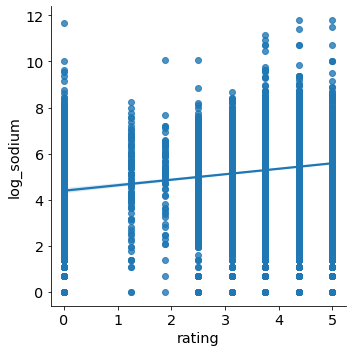

In [ ]:
sns.lmplot(y = 'log_sodium', x ='rating', data = receita1)

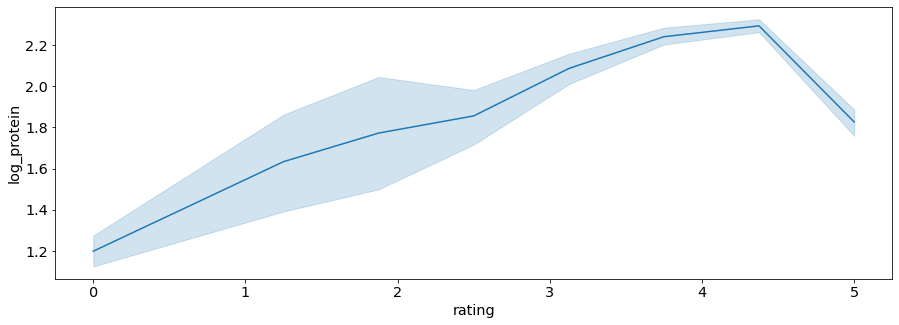

In [ ]:
sns.lineplot(y = 'log_protein', x ='rating', data = receita1 );

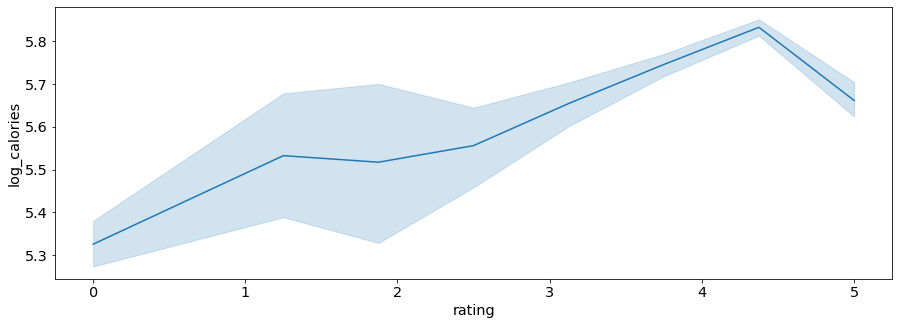

In [ ]:
sns.lineplot(y = 'log_calories', x ='rating', data = receita1 );

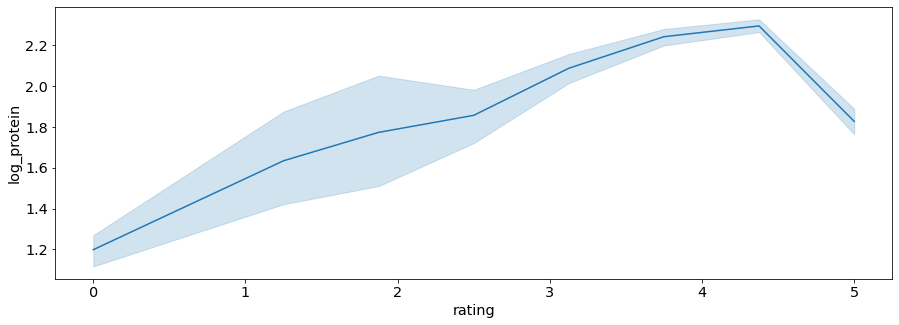

In [ ]:
sns.lineplot(y = 'log_protein', x ='rating', data = receita1 );

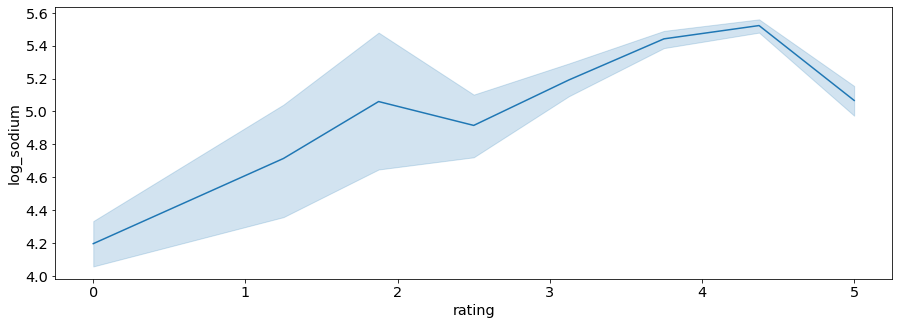

In [ ]:
sns.lineplot(y = 'log_sodium', x ='rating', data = receita1 );

## Respondendo algumas curiosidades.

### Há uma diferença entre os top 20 ingredientes comparando receitas com 5 e 0 de pontuação?

In [ ]:
rating5_igredientes = receita1[receita1.rating == 5].ingredients.explode().value_counts()
rating5_igredientes = rating5_igredientes.reset_index()
rating5_igredientes = rating5_igredientes.rename(columns = {'index':'igredients','ingredients':'freq'})

In [ ]:
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid", palette="Dark2")

##Ingredientes com 5 de rating.

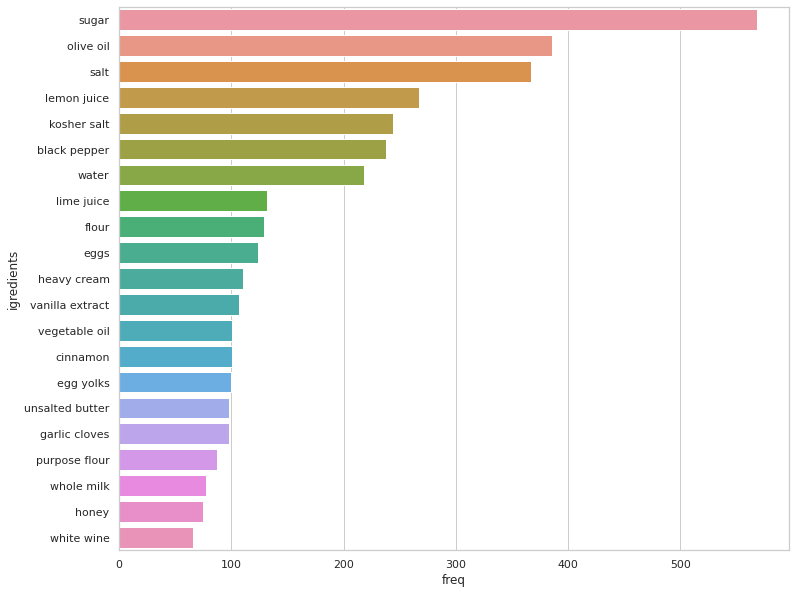

In [ ]:
ax = sns.barplot(x = 'freq',y = 'igredients',data= rating5_igredientes.sort_values('freq', ascending = False)[:21])
ax.figure.set_size_inches(12, 10)


##Ingredientes com 0 de rating.

In [ ]:
rating0_igredientes = receita1[receita1.rating  ==0].ingredients.explode().value_counts()
rating0_igredientes = rating0_igredientes.reset_index().rename(columns = {'index':'igredients','ingredients':'freq'})

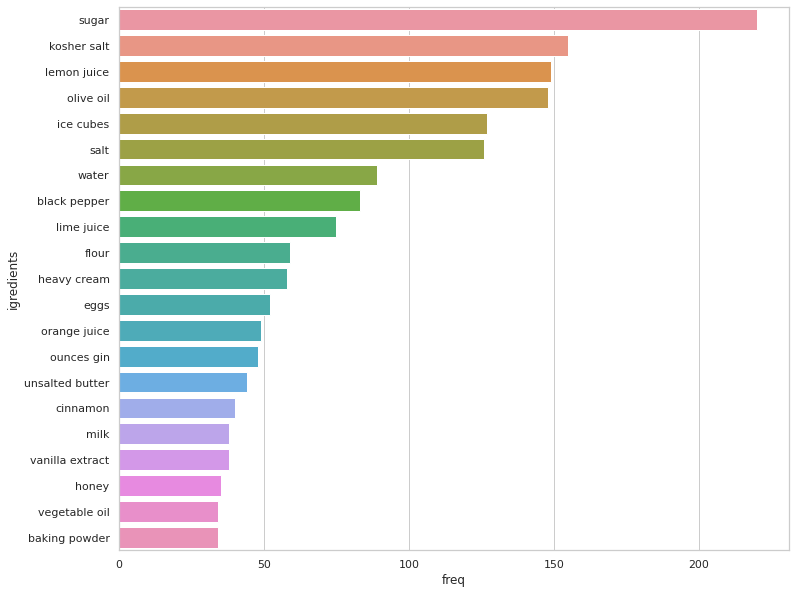

In [ ]:
ax = sns.barplot(x = 'freq',y = 'igredients',data= rating0_igredientes.sort_values('freq', ascending = False)[:21])
ax.figure.set_size_inches(12, 10)


##Quantidade de valores inseridos em relação aos anos.

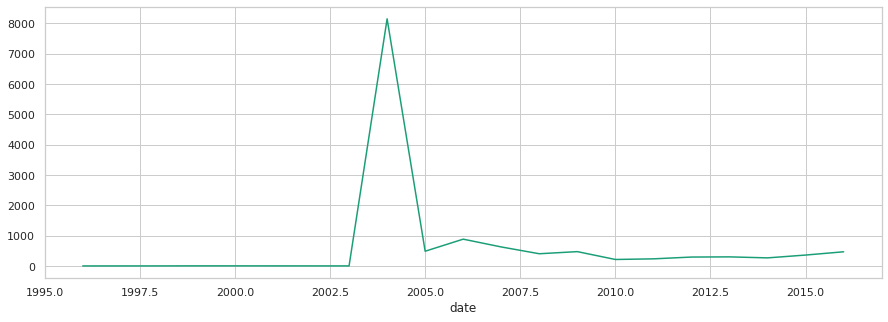

In [ ]:
receita1.groupby(receita1['date'].dt.year)['categories'].count().plot();

## Categorias que mais aparecem entre os reating.

In [ ]:
agrupamento_categorias_por_rating = receita1.explode('categories').groupby(receita1['rating'])['categories'].value_counts()

In [ ]:
agrupamento_categorias_por_rating = agrupamento_categorias_por_rating.reset_index(name = 'freq')

In [ ]:
agrupamento_categorias_por_rating_sem_bonappetit = agrupamento_categorias_por_rating[agrupamento_categorias_por_rating['categories'] != 'Bon Appétit']

O peanut Free (livre de amendoim) está sempre entre o top 3, o motivo disso é pelo fato de ser o alimento mais comum de reação alérgica.

Essas categorias free nos dizem mais sobre alergia do que a receita em si.

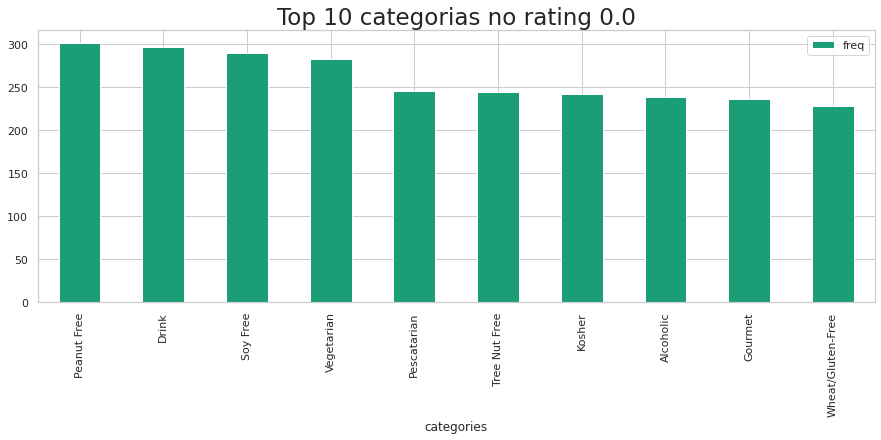

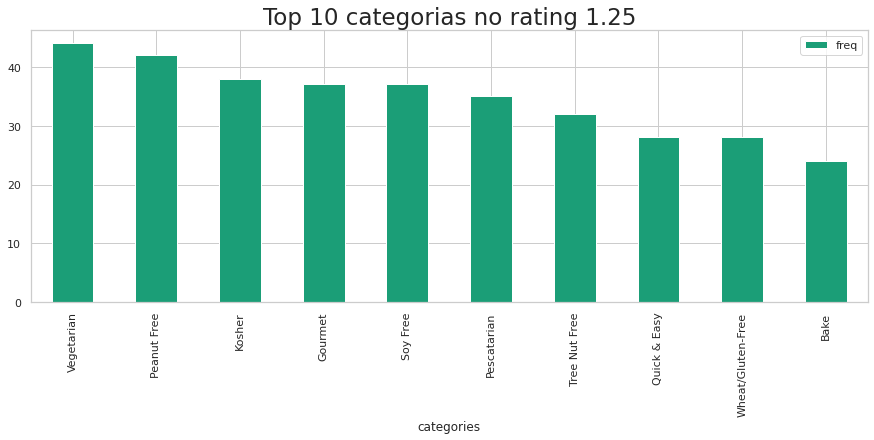

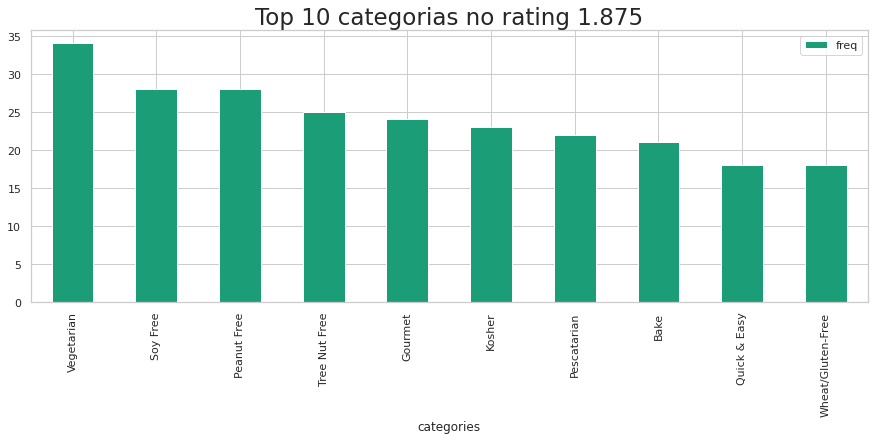

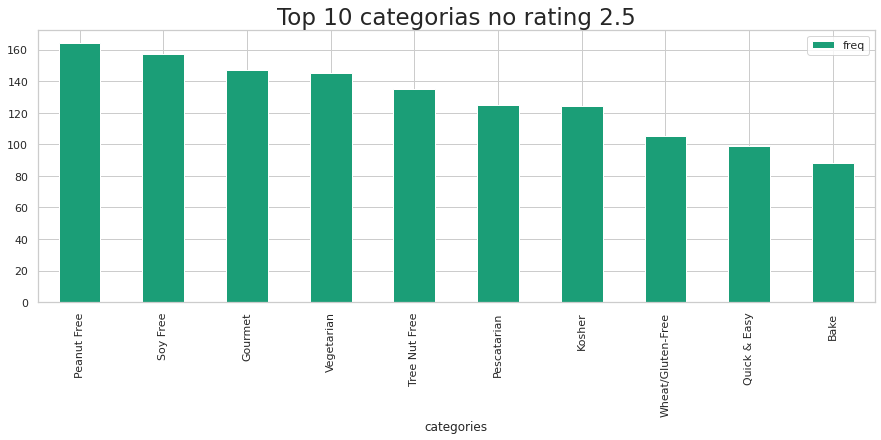

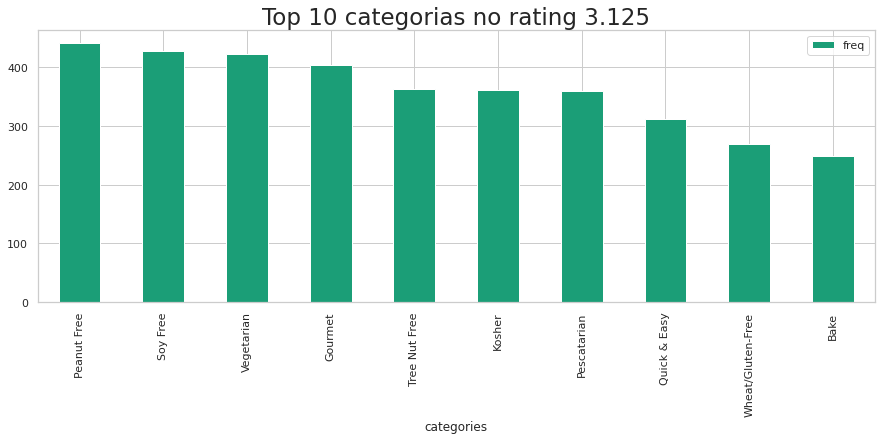

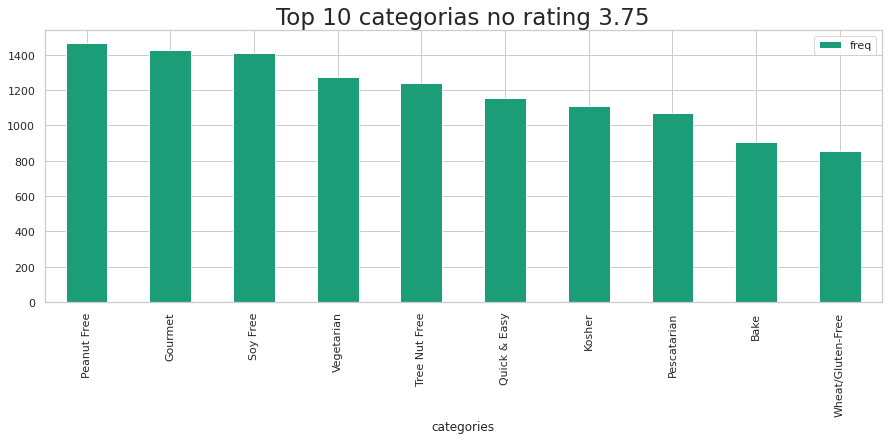

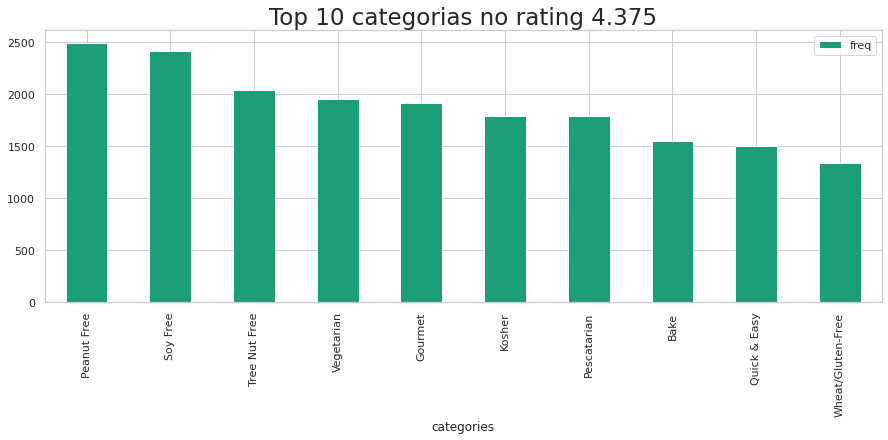

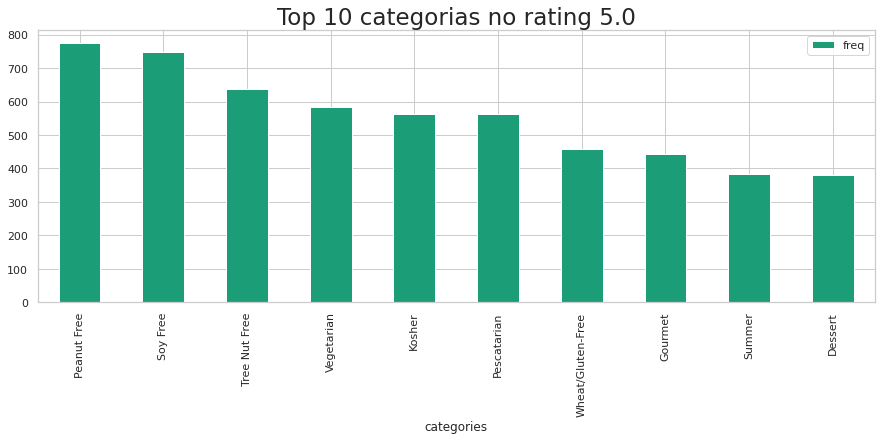

In [ ]:
for i in pd.Series(receita1.rating.unique()).sort_values().to_list():
  
  agrupamento_categorias_por_rating_sem_bonappetit[agrupamento_categorias_por_rating_sem_bonappetit['rating'] ==i].sort_values('freq', ascending = False) \
  [:10].plot(kind = 'bar', x = 'categories', y = 'freq')
  plt.title(f'Top 10 categorias no rating {i}', fontsize = 23)
  plt.show()

## Quanto mais detalhada as instruções a rating é maior?

In [ ]:
def numero_caracteres(x):
  soma = 0
  for i in x:
    soma += len(i)
  return soma


In [ ]:
receita1['num_instruções'] = receita1.directions.apply(lambda x: numero_caracteres(x))

In [ ]:
receita1['num_instruções'].describe()

count    13165.000000
mean       862.991417
std        573.156188
min          0.000000
25%        472.000000
50%        733.000000
75%       1119.000000
max       8193.000000
Name: num_instruções, dtype: float64

 Quanto maior o número de caracteres, em média, o rating vai ser maior.

In [ ]:
receita1[receita1['num_instruções']<862].describe()['rating']

count    7873.000000
mean        3.654341
std         1.349760
min         0.000000
25%         3.750000
50%         4.375000
75%         4.375000
max         5.000000
Name: rating, dtype: float64

In [ ]:
receita1[receita1['num_instruções']>862].describe()['rating']

count    5281.000000
mean        3.908469
std         1.124549
min         0.000000
25%         3.750000
50%         4.375000
75%         4.375000
max         5.000000
Name: rating, dtype: float64

H0:
>  A hipótese nula de que 2 amostras independentes têm média idêntica (esperada).

H1:

> As 2 amostras independentes têm média diferente.

Se P-value > 0,05 se aceita hipótese nula.

Se P-value < 0,05 se rejeita a hipótese nula.

In [ ]:
from scipy.stats import ttest_ind


resultado = ttest_ind(receita1[receita1['num_instruções']<862].rating, receita1[receita1['num_instruções']>862].rating, equal_var = False)

# extrai o p-value do resultado
p_value = resultado.pvalue

# imprime o p-value
print("O p-value é:", p_value)


O p-value é: 1.6282077640770234e-31


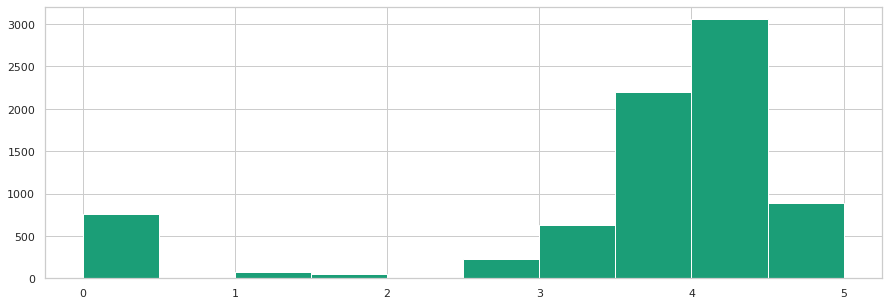

In [ ]:
receita1[receita1['num_instruções']<862].rating.hist()

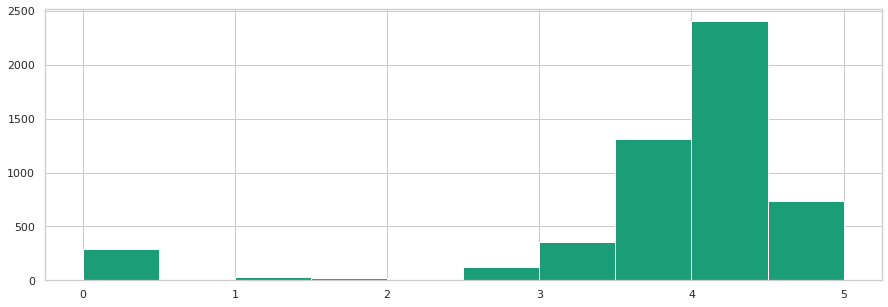

In [ ]:
receita1[receita1['num_instruções']>862].rating.hist()

Como a nossa distribuição não é gaussiana, vamos utilizar um método não paramétrico, como o teste de Mann-Whitney, que não faz suposições sobre a distribuição dos dados.

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
resultado = mannwhitneyu(receita1[receita1['num_instruções']<862].rating, receita1[receita1['num_instruções']>862].rating)

# extrai o p-value do resultado
p_value = resultado.pvalue

# imprime o p-value
print("O p-value é:", p_value)


O p-value é: 6.429153743918654e-30


As médias são diferentes, o que prova que quanto maior o número de caracteres na instrução, mais bem avaliada vai ser a receita.

# Considerações finais

A análise pode ser melhorada conversando com alguém da área de nutrição, em questão de insight, entender sobre a distribuição das variáveis como gordura e etc. Também seria possível criar novas features, misturando as features entre elas de diferentes maneiras com embasamento ciéntifico.

